## Hands-on Lab: Waffle Charts, Word Clouds, and Regression Plots

### Import Libraries

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import wordcloud
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts
from PIL import Image # converting images into arrays


### Fetching Data

In [5]:
df_can = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')

In [10]:
#set Country as index
df_can.set_index('Country', inplace=True)

### Waffle Charts

In [12]:
# let's create a new dataframe for these three countries 
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]

# let's take a look at our dataframe
df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


Step 1. The first step into creating a waffle chart is determing the proportion of each category with respect to the total.

In [13]:
# compute the proportion of each category with respect to the total
total_values = df_dsn['Total'].sum()

category_proportions = df_dsn['Total'] / total_values

# print out proportions
pd.DataFrame({"Category Proportion": category_proportions})

,Category Proportion
Country,
Denmark,0.322557
Norway,0.192409
Sweden,0.485034


Step 2. The second step is defining the overall size of the waffle chart.

In [16]:
width = 40 # width of chart
height = 10 # height of chart

total_num_tiles = width * height # total number of tiles

Step 3. The third step is using the proportion of each category to determe it respective number of tiles

In [17]:
# compute the number of tiles for each category
tiles_per_category = (category_proportions * total_num_tiles).round().astype(int)

# print out number of tiles per category
pd.DataFrame({"Number of tiles": tiles_per_category})

,Number of tiles
Country,
Denmark,129
Norway,77
Sweden,194


Step 4. The fourth step is creating a matrix that resembles the waffle chart and populating it.

In [18]:
# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width), dtype = np.uint)

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1       
            
        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index
        
print ('Waffle chart populated!')

Waffle chart populated!


In [19]:
waffle_chart

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

Step 5. Map the waffle chart matrix into a visual.

<Figure size 640x480 with 0 Axes>

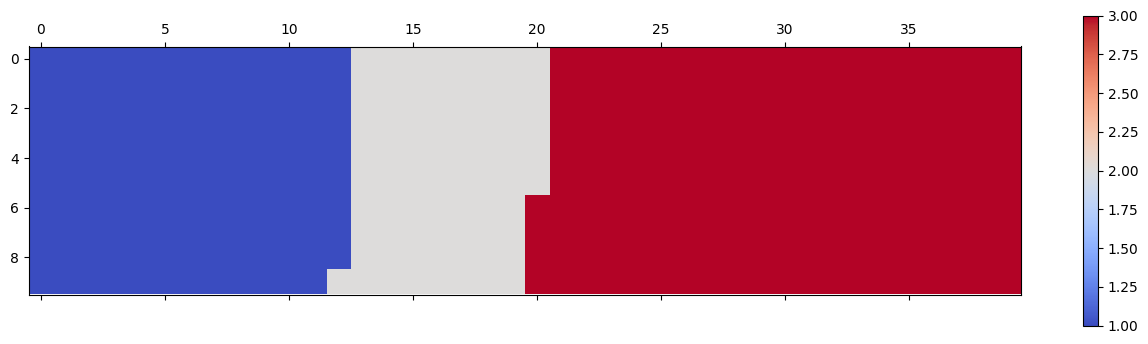

In [20]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()
plt.show()

Step 6. Prettify the chart.

<Figure size 640x480 with 0 Axes>

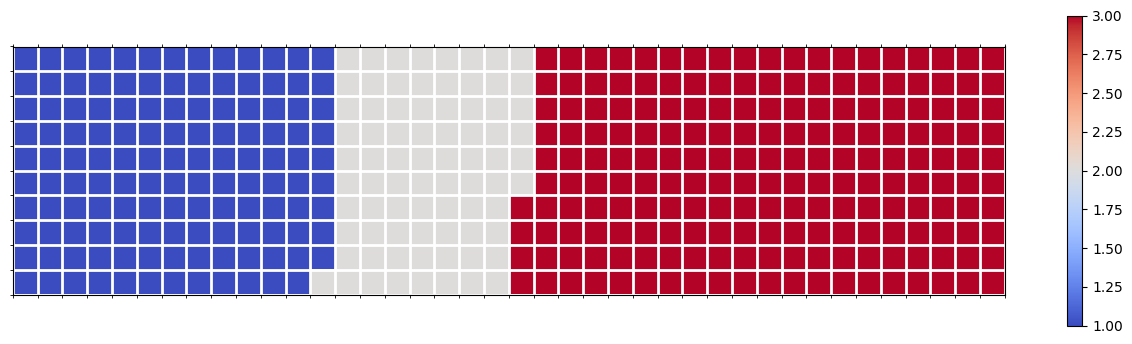

In [21]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])
plt.show()

Step 7. Create a legend and add it to chart.

/tmp/ipykernel_5707/2463873726.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_values = values_cumsum[len(values_cumsum) - 1]
/tmp/ipykernel_5707/2463873726.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
/tmp/ipykernel_5707/2463873726.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color_val = colormap(float(values_cumsum[i])/total_values)


<Figure size 640x480 with 0 Axes>

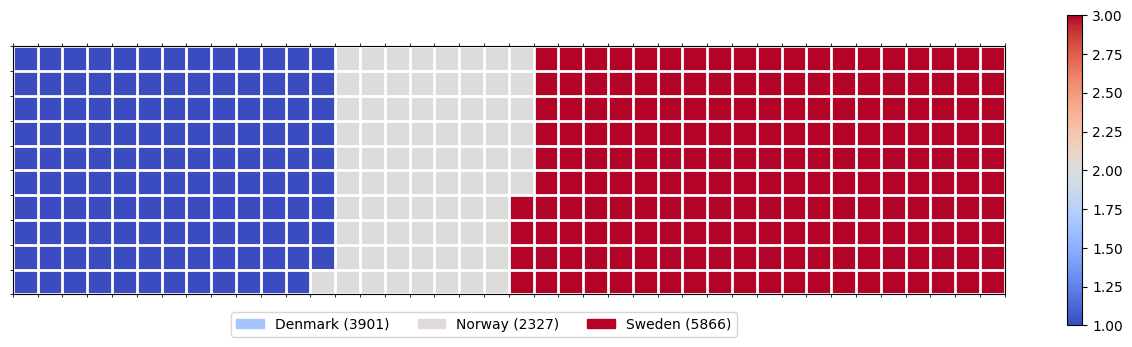

In [22]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )
plt.show()

So let's combine all seven steps into one function called create_waffle_chart.

In [23]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )
    plt.show()

There seems to be a new Python package for generating waffle charts called PyWaffle,

In [24]:
pip install pywaffle

  Obtaining dependency information for pywaffle from https://files.pythonhosted.org/packages/0b/99/e564248b5a2ec8f005a6209e2e59a458ce4850281fb28e4aa3571fe91f52/pywaffle-1.1.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for fontawesomefree from https://files.pythonhosted.org/packages/bb/e9/d43f5133b73e7ef9047bda28daaa6905e00b7d39f093b547f7e78ee2fc40/fontawesomefree-6.6.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 12.6 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


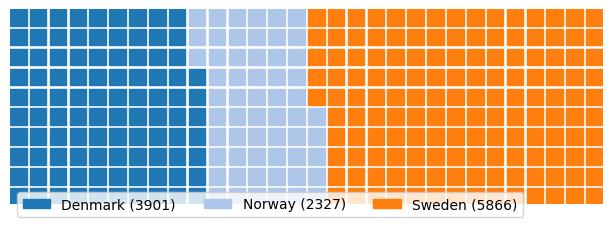

In [26]:
#import Waffle from pywaffle
from pywaffle import Waffle

#Set up the Waffle chart figure

fig = plt.figure(FigureClass = Waffle,
                 rows = 10, columns = 30, #pass the number of rows and columns for the waffle 
                 values = df_dsn['Total'], #pass the data to be used for display
                 cmap_name = 'tab20', #color scheme
                 legend = {'labels': [f"{k} ({v})" for k, v in zip(df_dsn.index.values,df_dsn.Total)],
                            'loc': 'lower left', 'bbox_to_anchor':(0,-0.1),'ncol': 3}
                 #notice the use of list comprehension for creating labels 
                 #from index and total of the dataset
                )

#Display the waffle chart
plt.show()

**Question:** Create a Waffle chart to dispaly the proportiona of China and Inida total immigrant contribution.

In [29]:
df_ci = df_can.loc[["China", "India"], "Total"]
df_ci

Country
China    659962
India    691904
Name: Total, dtype: int64

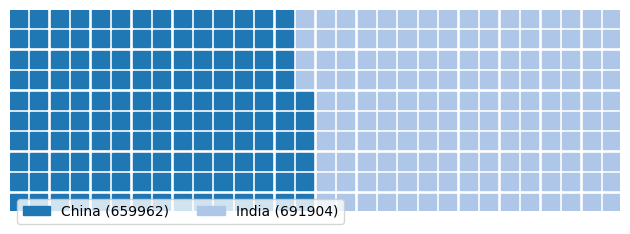

In [30]:
fig = plt.figure(FigureClass = Waffle,
                 rows = 10, columns = 30, #pass the number of rows and columns for the waffle 
                 values = df_ci, #pass the data to be used for display
                 cmap_name = 'tab20', #color scheme
                 legend = {'labels': [f"{k} ({v})" for k, v in zip(df_ci.index.values,df_ci)],
                            'loc': 'lower left', 'bbox_to_anchor':(0,-0.1),'ncol': 3}
                 #notice the use of list comprehension for creating labels 
                 #from index and total of the dataset
                )

#Display the waffle chart
plt.show()

### Word Clouds

In [33]:
#import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS
import urllib

In [34]:
# open the file and read it into a variable alice_novel
alice_novel = urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/alice_novel.txt').read().decode("utf-8")

In [36]:
stopwords = set(STOPWORDS)

# instantiate a word cloud object
alice_wc = WordCloud()

# generate the word cloud
alice_wc.generate(alice_novel)

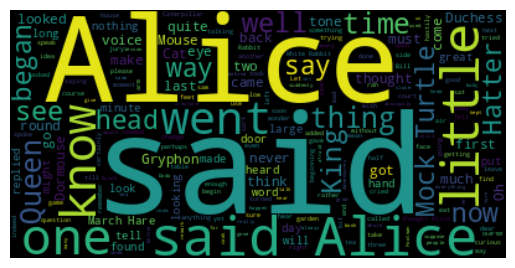

In [37]:
# display the word cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Much better! However, said isn't really an informative word. So let's add it to our stopwords and re-generate the cloud.

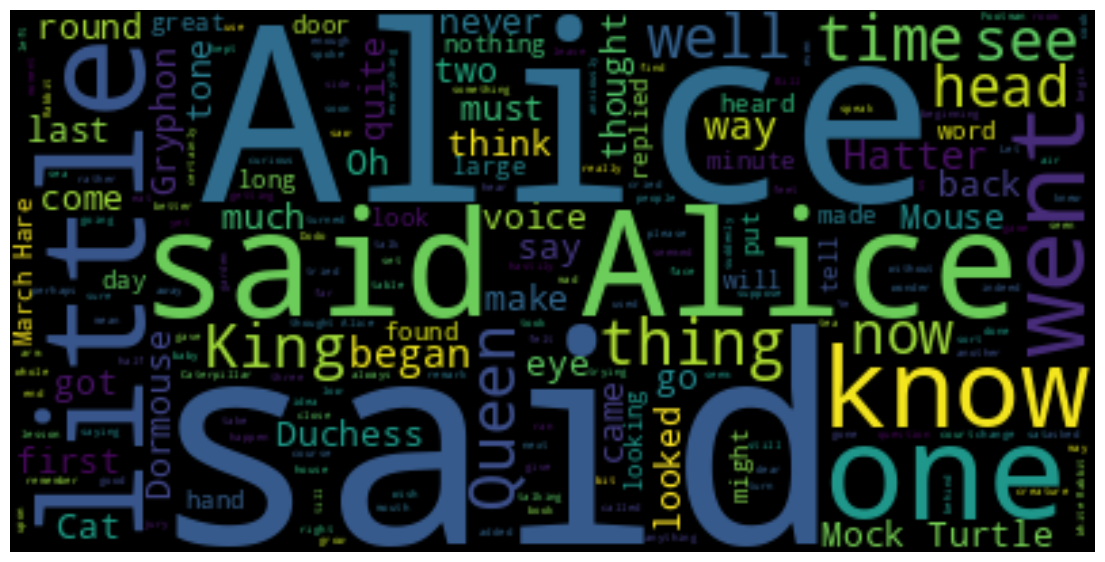

In [38]:
stopwords.add('said') # add the words said to stopwords

# re-generate the word cloud
alice_wc.generate(alice_novel)

# display the cloud
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [39]:
#save mask to alice_mask
alice_mask = np.array(Image.open(urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%204/images/alice_mask.png')))

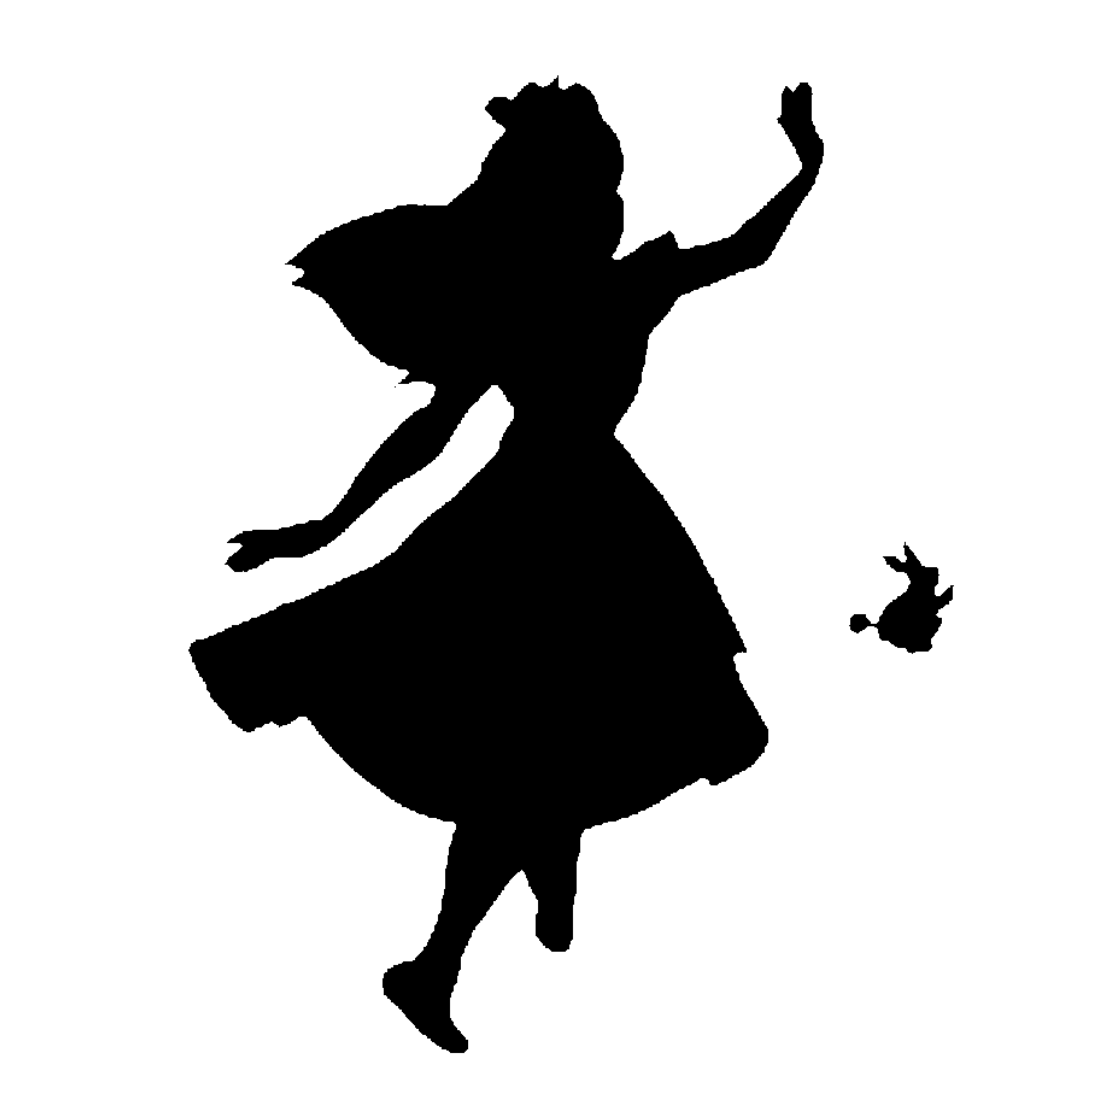

In [40]:
# Let's take a look at how the mask looks like.
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

Unfortunately, our immigration data does not have any text data, but where there is a will there is a way. Let's generate sample text data from our immigration dataset, say text data of 90 words.

In [42]:
total_immigration = df_can['Total'].sum()
total_immigration

np.int64(6409153)

In [43]:
max_words = 90
word_string = ''
for country in df_can.index.values:
     # check if country's name is a single-word name
    if country.count(" ") == 0:
        repeat_num_times = int(df_can.loc[country, 'Total'] / total_immigration * max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)

# display the generated text
word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

In [44]:
# create the word cloud
wordcloud = WordCloud(background_color='white').generate(word_string)

print('Word cloud created!')

Word cloud created!


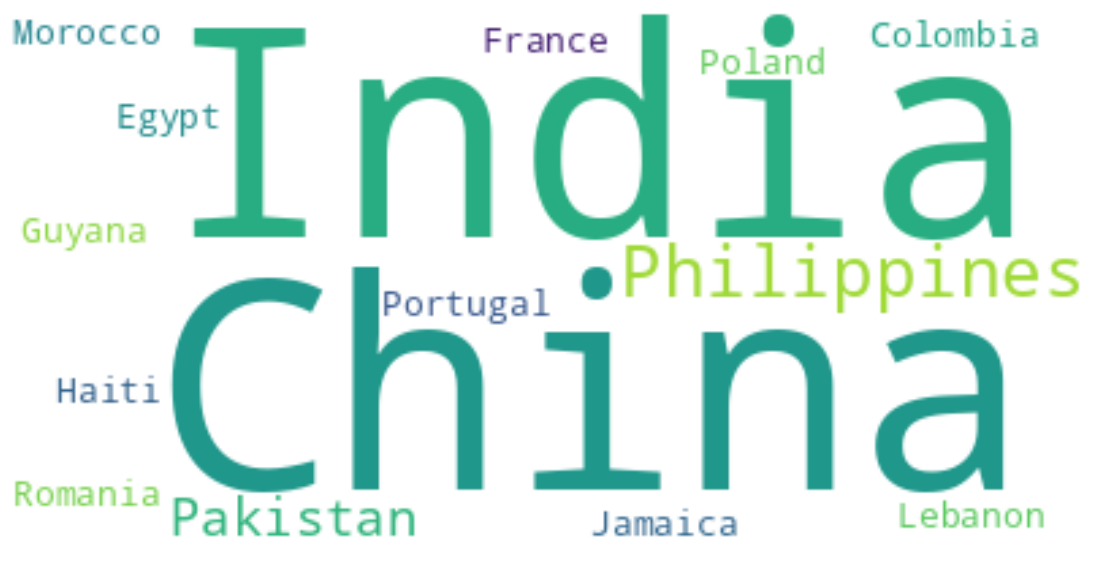

In [45]:
# display the cloud
plt.figure(figsize=(14, 18))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Plotting with Seaborn 

#### Categorical Plots

In [48]:
df_can['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Oceania',
       'Latin America and the Caribbean', 'Northern America'],
      dtype=object)

##### Countplot

<Axes: xlabel='Continent', ylabel='count'>

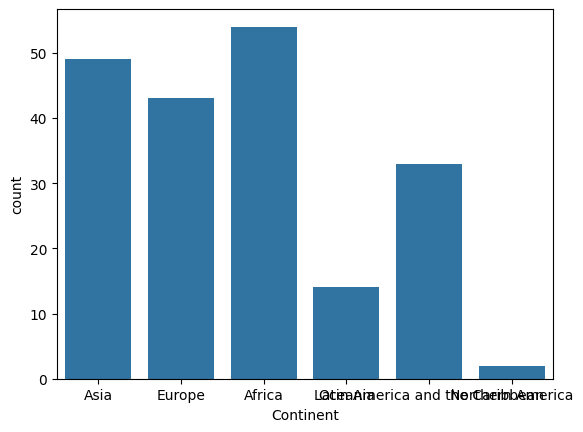

In [49]:
sns.countplot(x='Continent', data=df_can)

<Axes: xlabel='Continent', ylabel='count'>

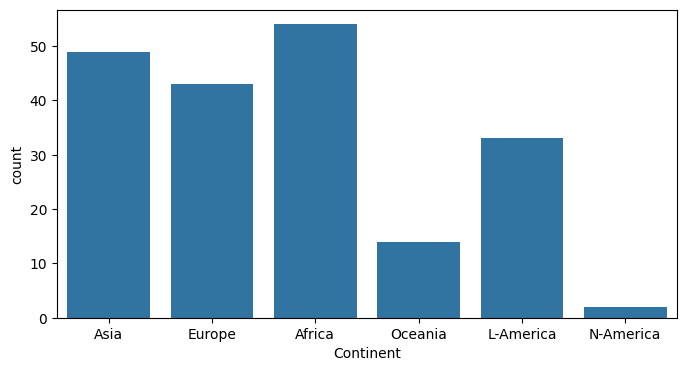

In [53]:
df_can1 = df_can.replace('Latin America and the Caribbean', 'L-America')
df_can1 = df_can1.replace('Northern America', 'N-America')

plt.figure(figsize=(8, 4))
sns.countplot(x='Continent', data=df_can1)

#### Barplot

<Axes: xlabel='Continent', ylabel='Total'>

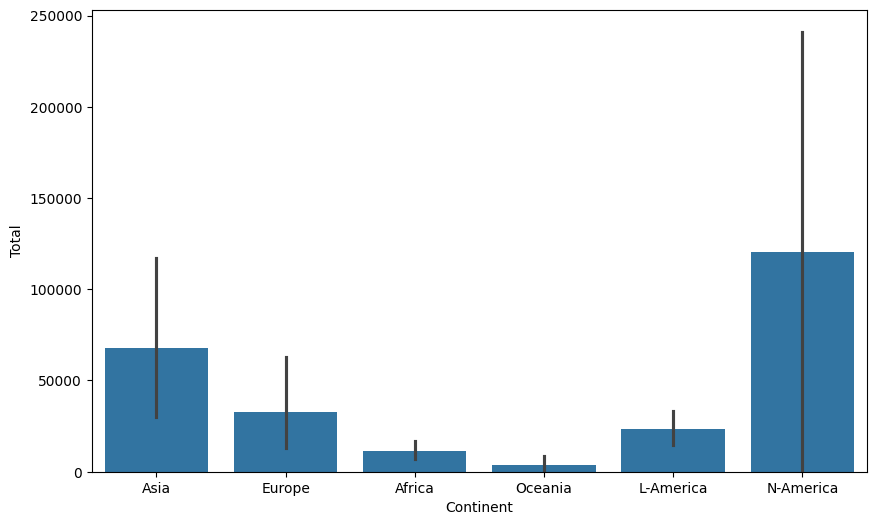

In [54]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Continent', y='Total', data=df_can1)

In [55]:
df_Can2=df_can1.groupby('Continent')['Total'].mean()
df_Can2

Continent
Africa        11462.000000
Asia          67710.081633
Europe        32812.720930
L-America     23186.303030
N-America    120571.000000
Oceania        3941.000000
Name: Total, dtype: float64

#### Regression Plot

In [56]:
years = list(map(str, range(1980, 2014)))
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type float (useful for regression later on)
df_tot.index = map(float, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace=True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


<Axes: xlabel='year', ylabel='total'>

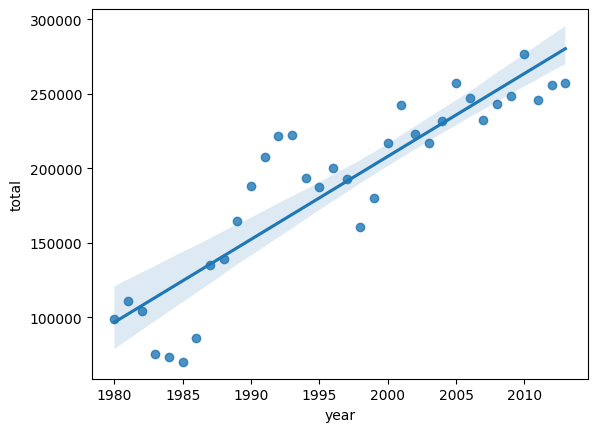

In [57]:
#seaborn is already imported at the start of this lab
sns.regplot(x='year', y='total', data=df_tot)

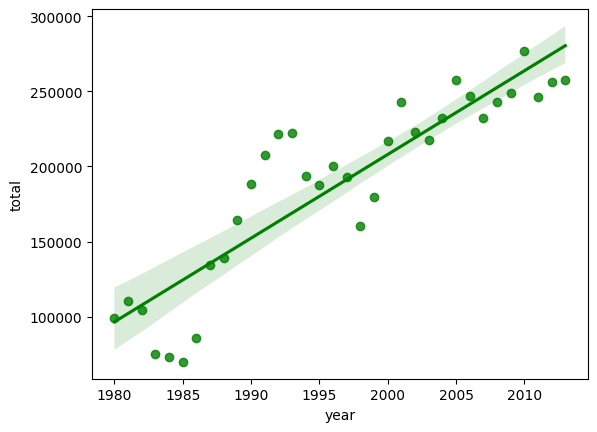

In [58]:
sns.regplot(x='year', y='total', data=df_tot, color='green')
plt.show()

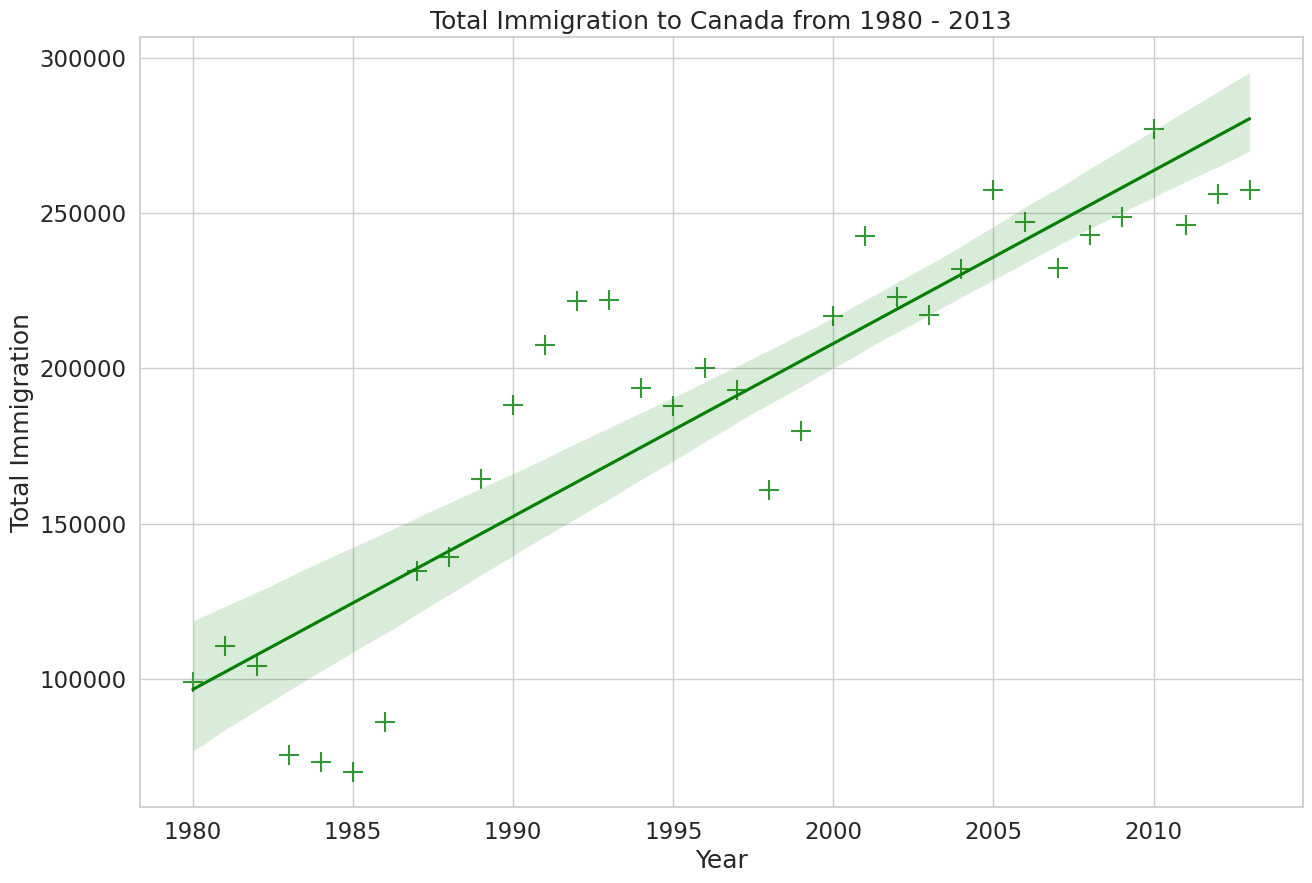

In [59]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')
plt.show()